# Clasificador de mangos (maduros o podridos)
Los datos que se utilizarán para el entrenamiento de este modelo de clasificación consisten en imágenes de los dos tipos de mango. 
A continuación, se presentará cuantas imágenes de cada grupo se utilizarán para el entrenamiento y la evaluación.

In [1]:
pip install matplotlib scikit-learn scikit-image numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ACER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


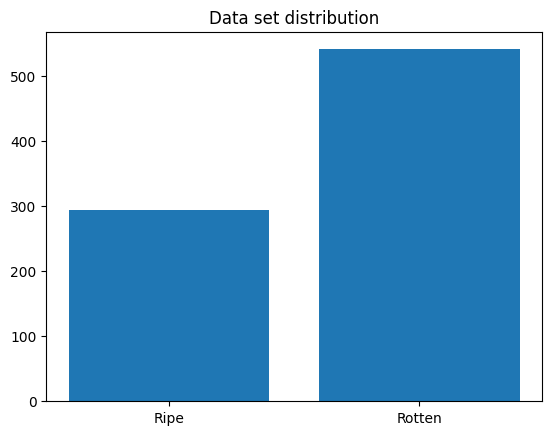

In [2]:
import os
import matplotlib.pyplot as pyplot

dirs = ['mangos_mascaras']
categories = ['Ripe', 'Rotten']

image_count = {}

for directory in dirs:
    count = 0
    for category in categories:
        image_count.setdefault(directory, {})
        image_count[directory][category] = len(os.listdir(os.path.join(directory, category)))

pyplot.title('Data set distribution')
pyplot.bar(image_count['mangos_mascaras'].keys(), image_count['mangos_mascaras'].values())
pyplot.show()

# Vectorización de imágenes


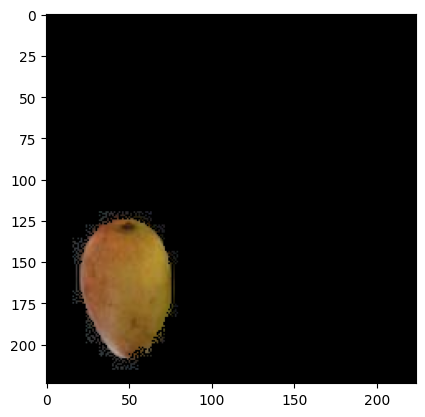

In [21]:
import skimage as ski
import numpy as np

test_image_path = os.path.join(dirs[0], categories[0])
test_image_mask_path = os.path.join(dirs[0], categories[0] + '_masks')
category = categories[0].lower()
image_name = os.listdir(test_image_path)[1]
test_image = os.path.join(test_image_path, image_name)
test_image_mask = os.path.join(test_image_mask_path, image_name.replace('.jpg', '') + '_mask_mask_'+ category + '.npy')
image = ski.io.imread(test_image)
image_mask = np.load(test_image_mask)

image_bytes = ski.util.img_as_ubyte(image)
image_mask = ski.color.gray2rgb(image_mask)

pyplot.imshow(image_bytes * image_mask)